### Face Recognition using Labeled Faces in the Wild

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
BASE = 'data/lfiw/'

In [4]:
ls {BASE}

lfw-10/   lfw-20/  lfw-deepfunneled/     lfw-names.txt.txt
lfw-100/  lfw-5/   lfw-deepfunneled.tgz  README.txt


In [5]:
PATH = 'data/lfiw/lfw-100/'

In [6]:
files = !ls {PATH}train/Tony_Blair
files

['Tony_Blair_0001.jpg',
 'Tony_Blair_0002.jpg',
 'Tony_Blair_0003.jpg',
 'Tony_Blair_0004.jpg',
 'Tony_Blair_0005.jpg',
 'Tony_Blair_0006.jpg',
 'Tony_Blair_0007.jpg',
 'Tony_Blair_0008.jpg',
 'Tony_Blair_0009.jpg',
 'Tony_Blair_0010.jpg',
 'Tony_Blair_0011.jpg',
 'Tony_Blair_0012.jpg',
 'Tony_Blair_0013.jpg',
 'Tony_Blair_0014.jpg',
 'Tony_Blair_0015.jpg',
 'Tony_Blair_0016.jpg',
 'Tony_Blair_0017.jpg',
 'Tony_Blair_0018.jpg',
 'Tony_Blair_0019.jpg',
 'Tony_Blair_0020.jpg',
 'Tony_Blair_0021.jpg',
 'Tony_Blair_0022.jpg',
 'Tony_Blair_0023.jpg',
 'Tony_Blair_0024.jpg',
 'Tony_Blair_0025.jpg',
 'Tony_Blair_0026.jpg',
 'Tony_Blair_0027.jpg',
 'Tony_Blair_0028.jpg',
 'Tony_Blair_0029.jpg',
 'Tony_Blair_0030.jpg',
 'Tony_Blair_0031.jpg',
 'Tony_Blair_0032.jpg',
 'Tony_Blair_0033.jpg',
 'Tony_Blair_0034.jpg',
 'Tony_Blair_0035.jpg',
 'Tony_Blair_0036.jpg',
 'Tony_Blair_0037.jpg',
 'Tony_Blair_0038.jpg',
 'Tony_Blair_0039.jpg',
 'Tony_Blair_0040.jpg',
 'Tony_Blair_0041.jpg',
 'Tony_Blair_004

In [7]:
files = !ls {PATH}valid/Tony_Blair | head
files

['Tony_Blair_0091.jpg',
 'Tony_Blair_0092.jpg',
 'Tony_Blair_0093.jpg',
 'Tony_Blair_0094.jpg',
 'Tony_Blair_0095.jpg',
 'Tony_Blair_0096.jpg',
 'Tony_Blair_0097.jpg',
 'Tony_Blair_0098.jpg',
 'Tony_Blair_0099.jpg',
 'Tony_Blair_0100.jpg']

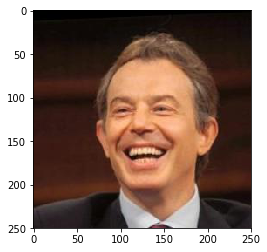

In [8]:
img = plt.imread(f'{PATH}valid/Tony_Blair/{files[0]}')
plt.imshow(img);

In [9]:
# Uncomment the below if you need to reset your precomputed activations
#!rm -rf {PATH}tmp

In [10]:
sz =224
#arch=resnet152
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 10)

A Jupyter Widget

[ 0.       1.71988  1.26796  0.52   ]                   
[ 1.       1.82516  2.87387  0.46   ]                   
[ 2.       2.40127  3.31154  0.54   ]                   
[ 3.       2.89244  5.94156  0.52   ]                   
[ 4.       3.2797   8.40023  0.48   ]                   
[  5.        3.7386   15.64487   0.5    ]               
[   6.         6.11164  108.91648    0.26   ]           
[  7.        7.98822  27.94118   0.42   ]               
[  8.        9.35816  13.91168   0.58   ]               
[  9.       10.11942  23.06453   0.54   ]               



In [11]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [12]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['Colin_Powell',
 'Donald_Rumsfeld',
 'George_W_Bush',
 'Gerhard_Schroeder',
 'Tony_Blair']

In [13]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(50, 5)

In [14]:
log_preds[:2]

array([[  -6.35402,   -0.00174,  -63.22874,  -54.31116,  -45.96499],
       [   0.     ,  -62.61458, -109.26988, -149.48856,  -41.19894]], dtype=float32)

In [15]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [16]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [17]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [18]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [19]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In single-label classification each sample belongs to one class. In the previous example, each image is either a *dog* or a *cat*.

Correctly classified


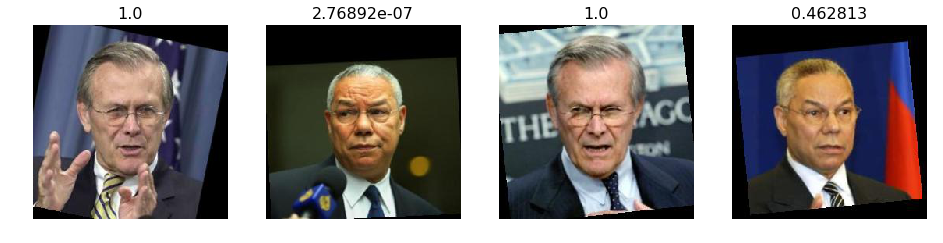

In [20]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


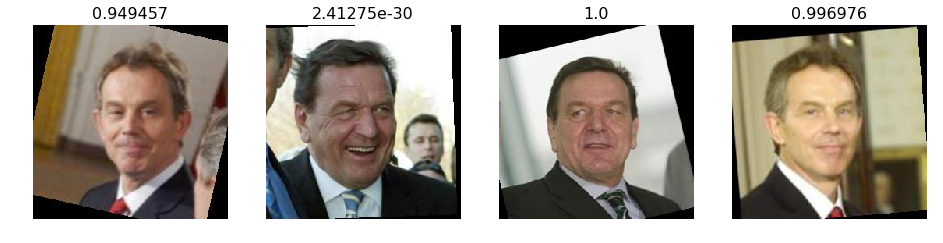

In [21]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [22]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [23]:
#Mistake! Correct this 
#plot_val_with_title(most_by_correct(0, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

In [24]:
#plot_val_with_title(most_by_correct(15, True), "Most correct Alejandro_Toledo") # 0 ->  Alejandro_Toledo

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [26]:
lrf=learn.lr_find()

A Jupyter Widget

[   0.         2.30899  557.58862    0.18   ]           



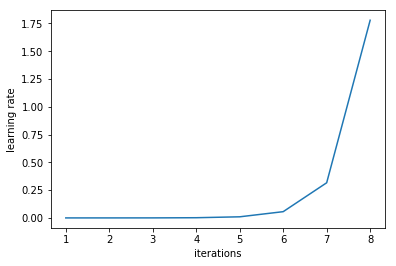

In [27]:
learn.sched.plot_lr()

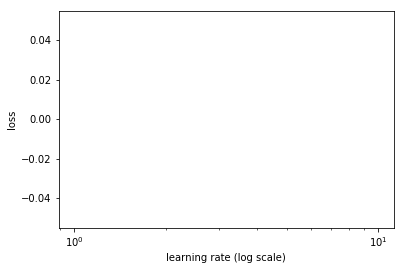

In [28]:
learn.sched.plot()

In [29]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [30]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [31]:
ims = np.stack([get_augs() for i in range(6)])

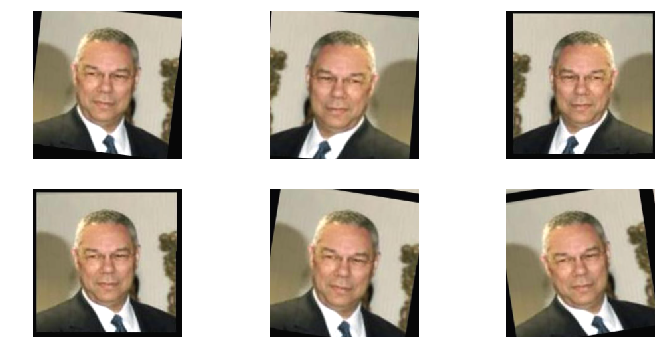

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True,ps=0.5)

In [34]:
learn.fit(1e-2, 1)

A Jupyter Widget

[ 0.       1.8931   1.50464  0.32   ]                   



In [35]:
learn.precompute=False

In [36]:
%time learn.fit(1e-1, 10, cycle_len=1)

A Jupyter Widget

[ 0.       1.81983  1.25783  0.5    ]                   
[ 1.       2.09765  1.34163  0.52   ]                   
[ 2.       2.33722  1.79316  0.64   ]                   
[ 3.       2.67183  2.82749  0.46   ]                   
[ 4.       2.92707  4.29199  0.48   ]                   
[ 5.       3.36226  4.09943  0.46   ]                   
[ 6.       3.40579  3.78072  0.42   ]                   
[ 7.       3.31387  3.01761  0.46   ]                   
[ 8.       3.20508  1.95059  0.42   ]                   
[ 9.       3.1576   2.66563  0.48   ]                   

CPU times: user 49.6 s, sys: 5.18 s, total: 54.8 s
Wall time: 33.2 s


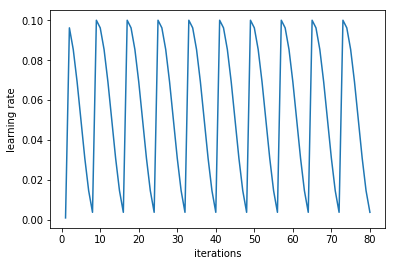

In [37]:
learn.sched.plot_lr()

In [38]:
learn.unfreeze()

In [48]:
learn.freeze_to(1)
lr=np.array([1e-4,1e-4, 2e-2])

In [49]:
%time learn.fit(lr, 7, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       1.26423  0.8603   0.62   ]                   
[ 1.       1.30526  0.90773  0.62   ]                   
[ 2.       1.18059  1.02636  0.56   ]                   
[ 3.       1.10734  0.87864  0.64   ]                   
[ 4.       1.05329  0.83083  0.74   ]                   
[ 5.       1.01     0.77985  0.72   ]                   
[ 6.       1.00403  0.76359  0.66   ]                    
[ 7.       0.9534   0.68366  0.74   ]                    
[ 8.       0.8978   0.66266  0.72   ]                    
[ 9.       0.87367  0.54645  0.8    ]                    
[ 10.        0.80789   0.48406   0.8    ]                
[ 11.        0.81939   0.48857   0.84   ]                
[ 12.        0.76844   0.52878   0.82   ]                
[ 13.        0.71324   0.50583   0.82   ]                
[ 14.        0.73264   0.51292   0.84   ]                
[ 15.        0.69603   0.47218   0.82   ]                
[ 16.        0.66228   0.54732   0.82   ]                
[ 17.        0.66062

In [50]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.92000000000000004

In [51]:
learn.save(f'{sz}')

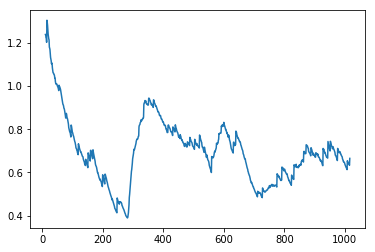

In [52]:
learn.sched.plot_loss()

### End

## New heading

# New heading